In [1]:
import csv
import numpy as np

data_list = []

with open("csv/Pumpkin_Seeds_Dataset.csv", newline='', encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    
    next(reader)
    for row in reader:
        data_list.append(row)

data = np.array(data_list)
print(data[:5])

[['56276' '888.242' '326.1485' '220.2388' '56831' '267.6805' '0.7376'
  '0.9902' '0.7453' '0.8963' '1.4809' '0.8207' 'Çerçevelik']
 ['76631' '1068.146' '417.1932' '234.2289' '77280' '312.3614' '0.8275'
  '0.9916' '0.7151' '0.844' '1.7811' '0.7487' 'Çerçevelik']
 ['71623' '1082.987' '435.8328' '211.0457' '72663' '301.9822' '0.8749'
  '0.9857' '0.74' '0.7674' '2.0651' '0.6929' 'Çerçevelik']
 ['66458' '992.051' '381.5638' '222.5322' '67118' '290.8899' '0.8123'
  '0.9902' '0.7396' '0.8486' '1.7146' '0.7624' 'Çerçevelik']
 ['66107' '998.146' '383.8883' '220.4545' '67117' '290.1207' '0.8187'
  '0.985' '0.6752' '0.8338' '1.7413' '0.7557' 'Çerçevelik']]


In [2]:
features = data[:, :-1].astype(float)
labels = data[:, -1]
labels = [0 if label[-1] == 'k' else 1 for label in labels]

print(features[:, 0])
print(labels[:5], labels[-5:])
print(features.shape)

[56276. 76631. 71623. ... 87994. 80011. 84934.]
[0, 0, 0, 0, 0] [1, 1, 1, 1, 1]
(2500, 12)


In [3]:
from sklearn.preprocessing import MinMaxScaler

# normalisation
scaler = MinMaxScaler()

features = scaler.fit_transform(features)

print(features)

[[0.09405991 0.02859334 0.01555092 ... 0.88753247 0.16645788 0.75530369]
 [0.3237096  0.28895964 0.28249196 ... 0.75168831 0.31688129 0.54606219]
 [0.26720821 0.3104383  0.33714285 ... 0.55272727 0.45918725 0.38390003]
 ...
 [0.45190952 0.49471247 0.54644854 ... 0.52025974 0.56827178 0.28799768]
 [0.36184352 0.45510554 0.53086948 ... 0.42571429 0.65270331 0.21825051]
 [0.41738591 0.4217985  0.41648892 ... 0.62       0.41328857 0.43475734]]


In [4]:
from sklearn.model_selection import train_test_split

all_ids = np.arange(0, data.shape[0])

random_seed = 1

# training : test = 2000 : 500, real_training : validation = 1600 : 400 
rem_set_ids, test_set_ids = train_test_split(all_ids, test_size=0.2, train_size=0.8,
                                 random_state=random_seed, shuffle=True)

train_set_ids, val_set_ids = train_test_split(rem_set_ids, test_size=0.2, train_size=0.8,
                                 random_state=random_seed, shuffle=True)

training_features = features[train_set_ids, :]
training_labels = [labels[i] for i in train_set_ids]

test_features = features[test_set_ids, :]
test_labels = [labels[i] for i in test_set_ids]

val_features = features[val_set_ids, :]
val_labels = [labels[i] for i in val_set_ids]

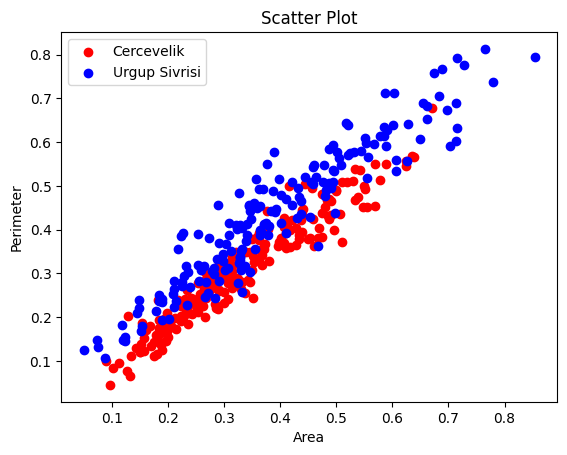

In [5]:
import matplotlib.pyplot as plt

def draw_by_features(truple):
    x_label = val_features[:, truple[0]]
    y_label = val_features[:, truple[1]]
    
    idx_0 = []
    idx_1 = []
    
    for i, label in enumerate(val_labels):
        if label == 0:
            idx_0.append(i)
        else:
            idx_1.append(i)

    plt.scatter(x_label[idx_0], y_label[idx_0], color="red", label="Cercevelik")
    plt.scatter(x_label[idx_1], y_label[idx_1], color="blue", label="Urgup Sivrisi")
    
    plt.legend()
    plt.title("Scatter Plot")
    plt.xlabel("Area")
    plt.ylabel("Perimeter")
    plt.show()
    
draw_by_features((0, 1))

SVC

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_c_options = [0.1, 1.0, 10.0]
svc_k_options = ["linear", "poly", "rbf", "sigmoid"]
svc_results = {}

for k in svc_k_options:
    for c in svc_c_options:
        model_SVC = SVC(kernel=k, C=c, random_state=random_seed)
        model_SVC.fit(training_features, training_labels)
        val_pred_SVC = model_SVC.predict(val_features)
        val_acc_SVC = accuracy_score(val_labels, val_pred_SVC)
        
        svc_results.update({(k, c) : val_acc_SVC})

svc_results_sorted = sorted(svc_results.items(), key=lambda x : x[1], reverse=True)
print(svc_results_sorted)
best_svc_k, best_svc_c = svc_results_sorted[0][0]

print(best_svc_k, best_svc_c)

[(('poly', 0.1), 0.885), (('poly', 10.0), 0.885), (('poly', 1.0), 0.88), (('rbf', 10.0), 0.88), (('linear', 10.0), 0.8775), (('rbf', 1.0), 0.8725), (('linear', 1.0), 0.87), (('rbf', 0.1), 0.87), (('linear', 0.1), 0.8525), (('sigmoid', 10.0), 0.5675), (('sigmoid', 0.1), 0.5525), (('sigmoid', 1.0), 0.5525)]
poly 0.1


In [9]:
model_SVC = SVC(kernel=best_svc_k, C=best_svc_c, random_state=random_seed)
model_SVC.fit(training_features, training_labels)

test_pred_SVC = model_SVC.predict(test_features)
test_acc_SVC = accuracy_score(test_labels, test_pred_SVC)

print("\n The overall accuracy is: " + str(test_acc_SVC))


 The overall accuracy is: 0.872


Knn

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_results = []
for n in range(1, 21):
    model_KNN = KNeighborsClassifier(n_neighbors=n)
    model_KNN.fit(training_features, training_labels)
    val_pred_KNN = model_KNN.predict(val_features)
    val_acc_KNN = accuracy_score(val_labels, val_pred_KNN)
    knn_results.append((n, val_acc_KNN))

print(knn_results)
knn_results_sorted = sorted(knn_results, key=lambda x : x[1], reverse=True)
best_n = knn_results_sorted[0][0]
print('\n', best_n)

[(1, 0.8225), (2, 0.8425), (3, 0.8525), (4, 0.8625), (5, 0.8575), (6, 0.855), (7, 0.8525), (8, 0.8625), (9, 0.85), (10, 0.86), (11, 0.8575), (12, 0.8625), (13, 0.8625), (14, 0.8725), (15, 0.8725), (16, 0.875), (17, 0.87), (18, 0.87), (19, 0.8675), (20, 0.8625)]

 16


In [11]:
model_KNN = KNeighborsClassifier(n_neighbors=best_n)
model_KNN.fit(training_features, training_labels)
test_pred_KNN = model_KNN.predict(test_features)
test_acc_KNN = accuracy_score(test_labels, test_pred_KNN)
print("\n The overall accuracy is:", test_acc_KNN)


 The overall accuracy is: 0.868


Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

lr_c_options = [0.1, 1.0, 10.0]
lr_results = []

for c in lr_c_options:
    model_LR = LogisticRegression(C=c, random_state=random_seed)
    model_LR.fit(training_features, training_labels)
    val_pred_LR = model_LR.predict(val_features)
    val_acc_LR = accuracy_score(val_labels, val_pred_LR)
    lr_results.append((c, val_acc_LR))

lr_results_sorted = sorted(lr_results, key=lambda x: x[1], reverse=True)

print(lr_results_sorted)
best_lr_c = lr_results_sorted[0][0]
print('\n', best_lr_c)

[(10.0, 0.8625), (1.0, 0.86), (0.1, 0.855)]

 10.0


In [13]:
model_LR = LogisticRegression(C=best_lr_c, random_state=random_seed)
model_LR.fit(training_features, training_labels)
test_pred_LR = model_LR.predict(test_features)
test_acc_LR = accuracy_score(test_labels, test_pred_LR)

print("\n The overall accuracy for Logistic Regression is:", test_acc_LR)


 The overall accuracy for Logistic Regression is: 0.852


Decision Tree

In [14]:
from sklearn.ensemble import BaggingClassifier

ntrees_options = [1, 10, 100]
ntrees_results = []
features_number = int(training_features.shape[1]**0.5)

for nt in ntrees_options:
    model_DT = BaggingClassifier(n_estimators=nt, max_features=features_number, random_state=random_seed)
    model_DT.fit(training_features, training_labels)
    val_pred_DT = model_DT.predict(val_features)
    val_acc_DT = accuracy_score(val_labels, val_pred_DT)
    ntrees_results.append((nt, val_acc_DT))

ntrees_results_sorted = sorted(ntrees_results, key=lambda x:x[1], reverse=True)
best_ntrees = ntrees_results_sorted[0][0]

print(ntrees_results_sorted)
print(best_ntrees)

[(100, 0.88), (10, 0.865), (1, 0.585)]
100


In [15]:
model_DT = BaggingClassifier(n_estimators=best_ntrees, max_features=features_number, random_state=random_seed)
model_DT.fit(training_features, training_labels)

test_pred_DT = model_DT.predict(test_features)
test_acc_DT = accuracy_score(test_labels, test_pred_DT)
print("\n The overall accuracy is: ", str(test_acc_DT))


 The overall accuracy is:  0.882
